In [1]:
import pandas  as pd
import   numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection   import train_test_split
import pickle
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [5]:
data.shape

(7043, 21)

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
invalid_totalcharges = data[data['TotalCharges'].str.contains(r'[A-Za-z]', na=False)]

invalid_totalcharges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [9]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

In [10]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [11]:
data.describe(include=['O'])

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [12]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [13]:
churn_percent = data['Churn'].value_counts(normalize=True) * 100
print(churn_percent)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [14]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
mean_val = data["TotalCharges"].mean()
data["TotalCharges"] = data["TotalCharges"].fillna(mean_val)

In [16]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

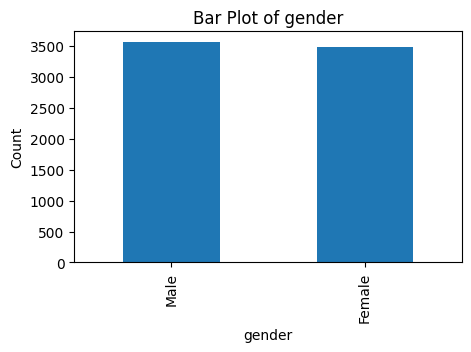

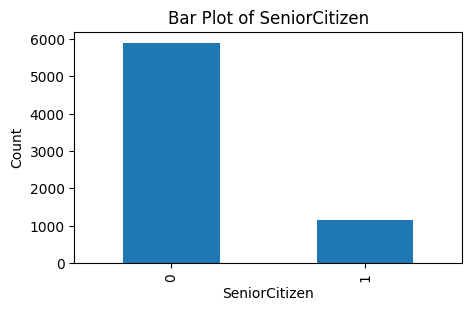

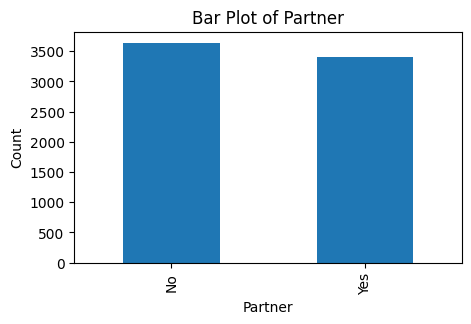

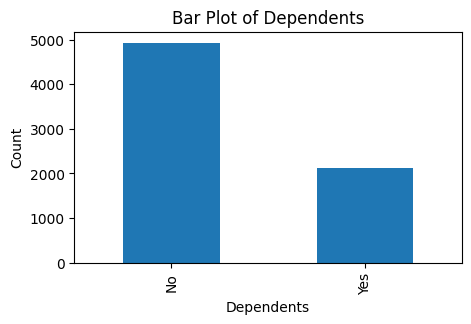

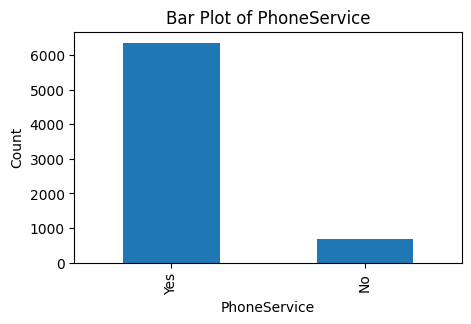

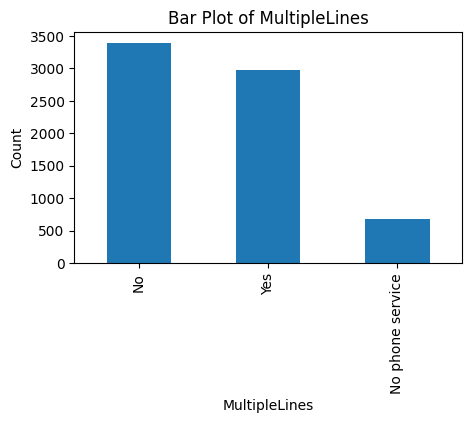

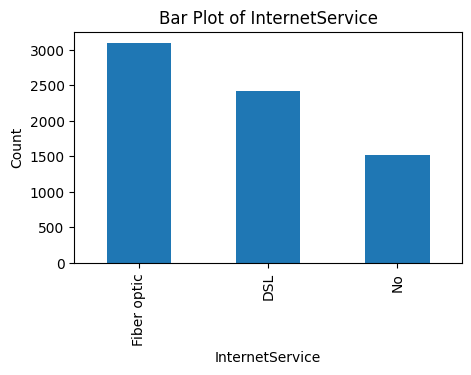

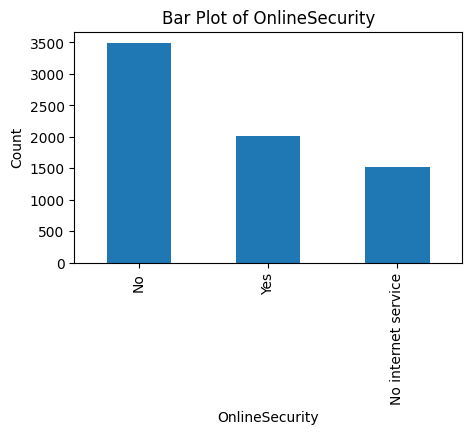

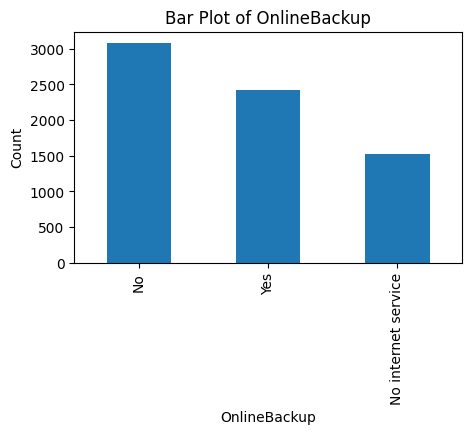

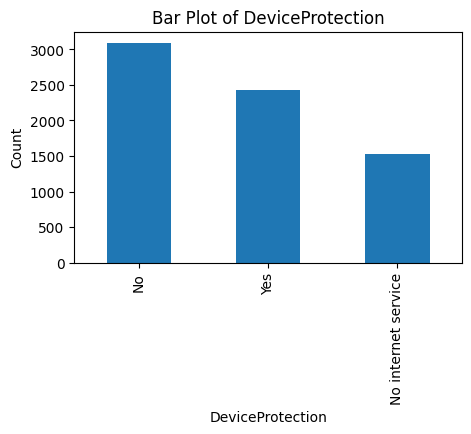

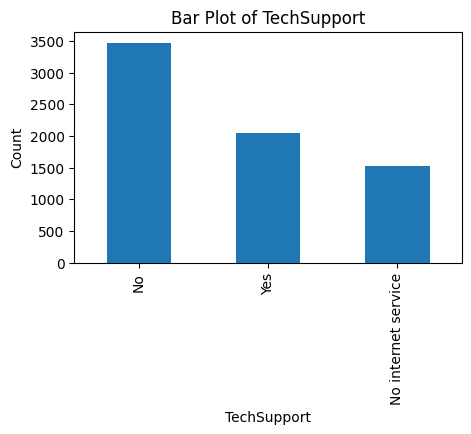

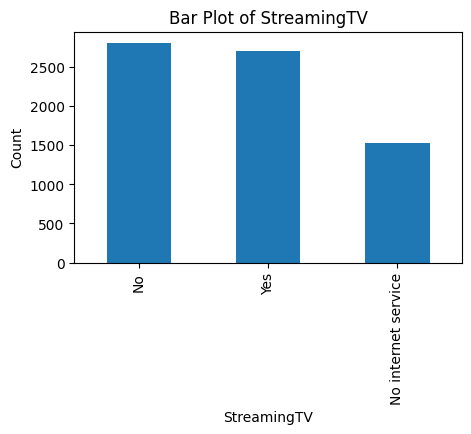

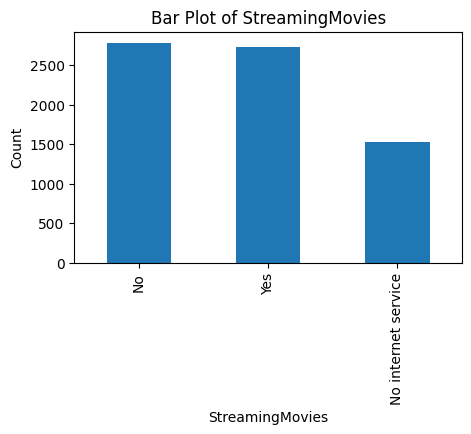

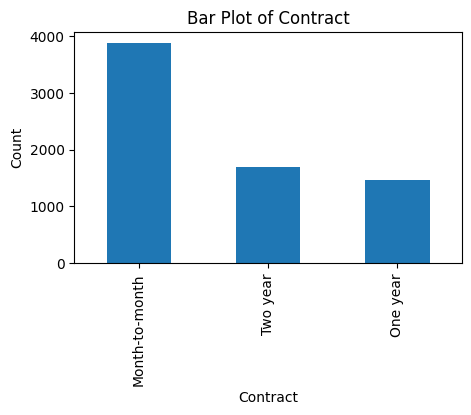

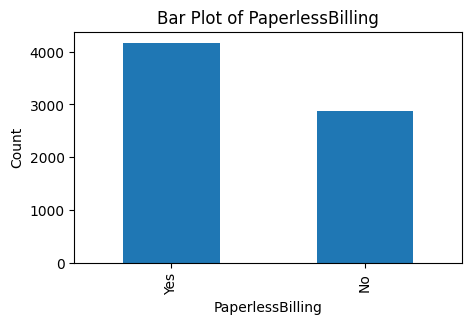

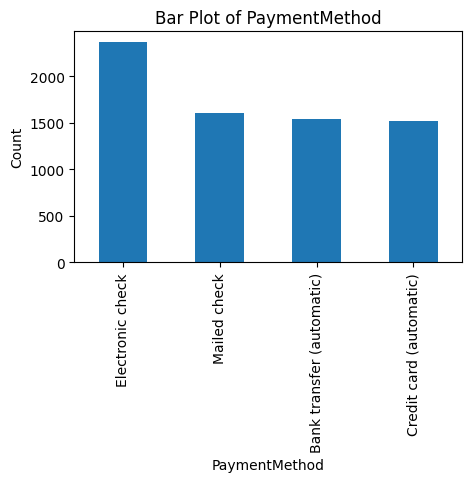

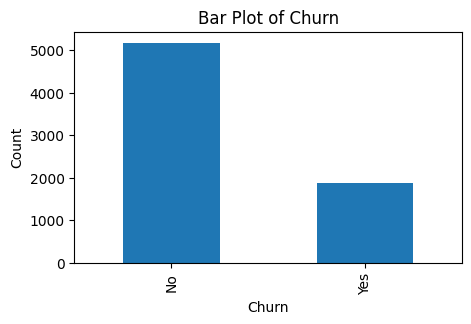

In [17]:
import matplotlib.pyplot as plt

# Loop through each column
for col in data.select_dtypes(include=['object']).columns:
    if col != "customerID":   # exclude customerID
        plt.figure(figsize=(5, 3))
        data[col].value_counts().plot(kind='bar')
        plt.title(f"Bar Plot of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

In [18]:
# fig, ax = plt.subplots(ncols=3, nrows=7, figsize=(15, 8))  # adjust grid to number of plots
# ax = ax.flatten()  # flatten to 1D array
# index = 0

# # Loop through categorical columns except customerID
# for col in data.select_dtypes(include=['object']).columns:
#     if col != 'customerID':
#         sns.countplot(x=col, data=data, ax=ax[index])  # use countplot instead of barplot for categories
#         ax[index].set_title(f"Bar Plot of {col}")
#         index += 1

# plt.tight_layout(pad=2.0, w_pad=0.7, h_pad=3.0)
# plt.show()

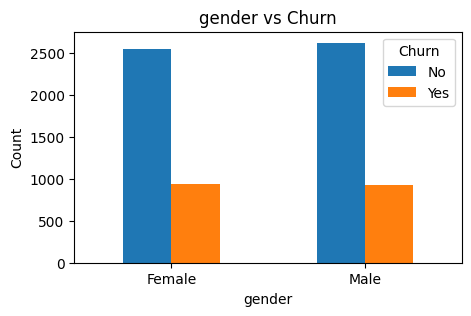

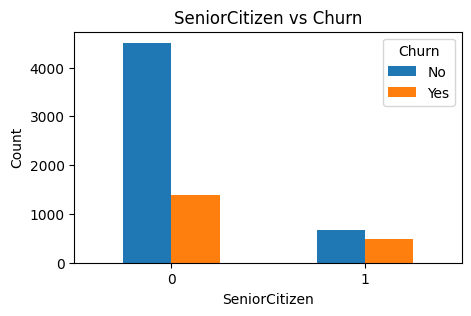

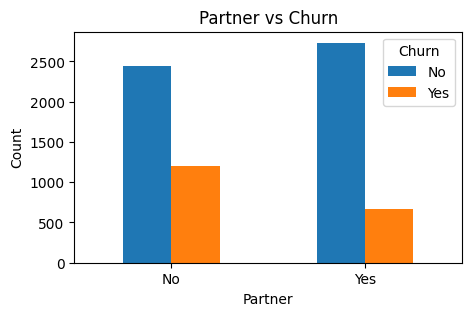

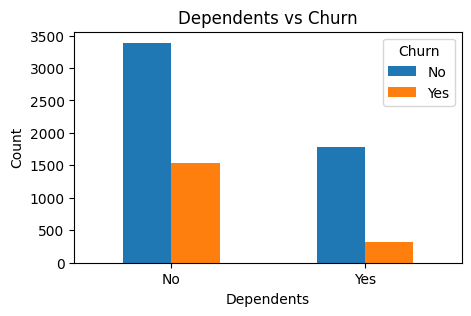

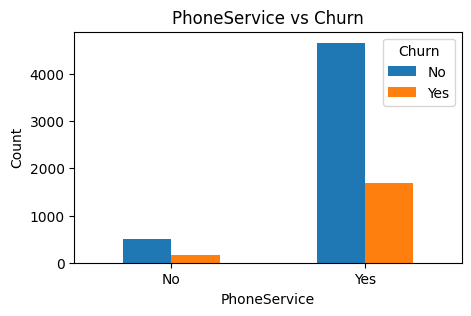

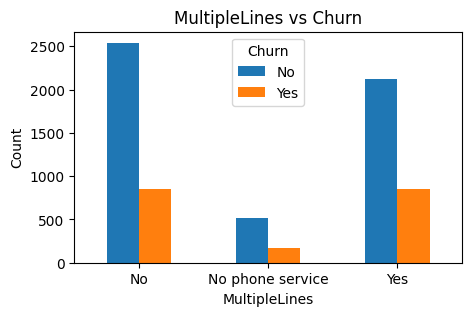

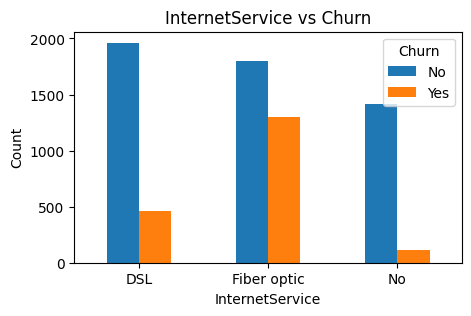

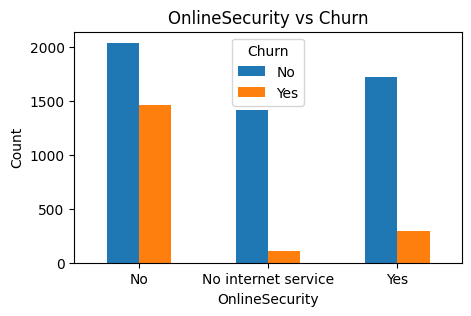

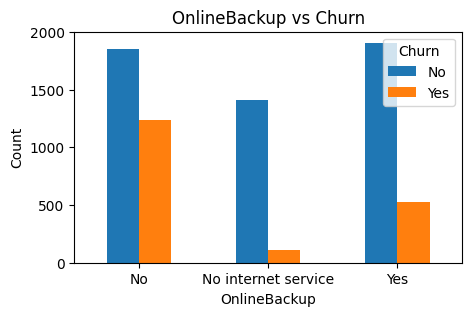

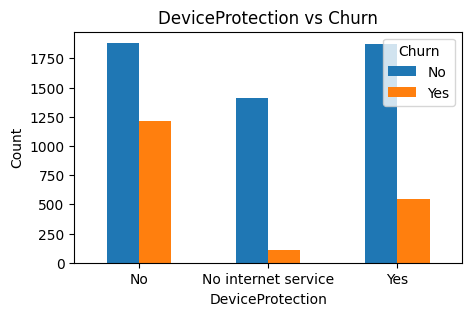

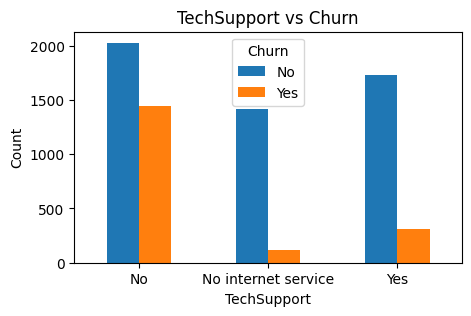

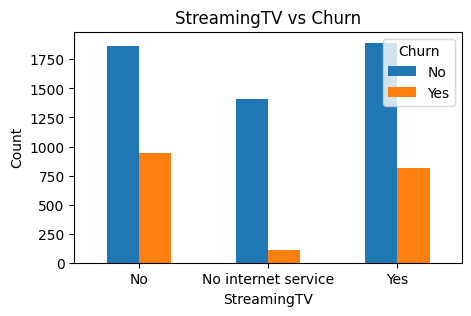

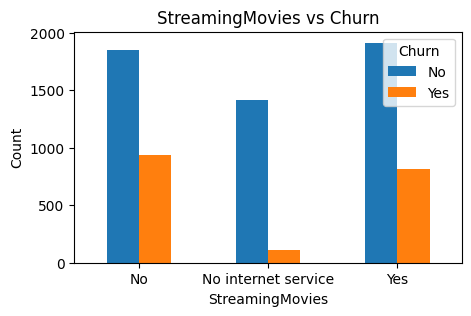

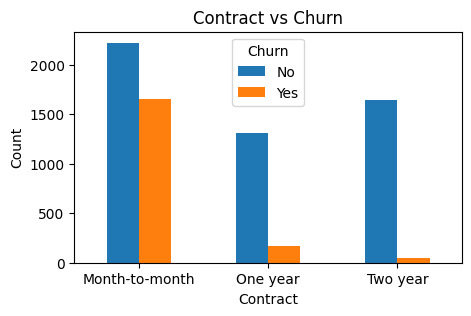

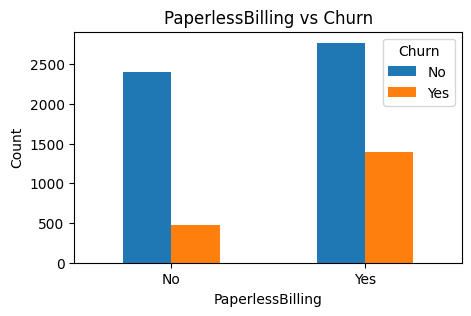

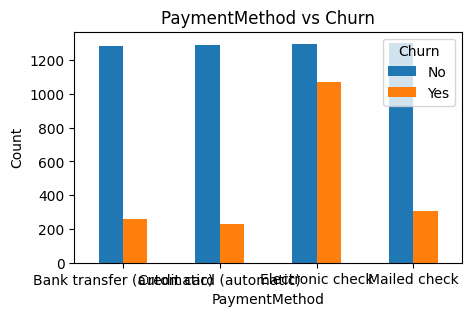

In [19]:
for col in data.select_dtypes(include=['object']).columns:
    if col not in ["customerID", "Churn"]:
        cross_tab = pd.crosstab(data[col], data["Churn"])
        cross_tab.plot(kind='bar', figsize=(5,3))
        plt.title(f"{col} vs Churn")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=0)
        plt.show()

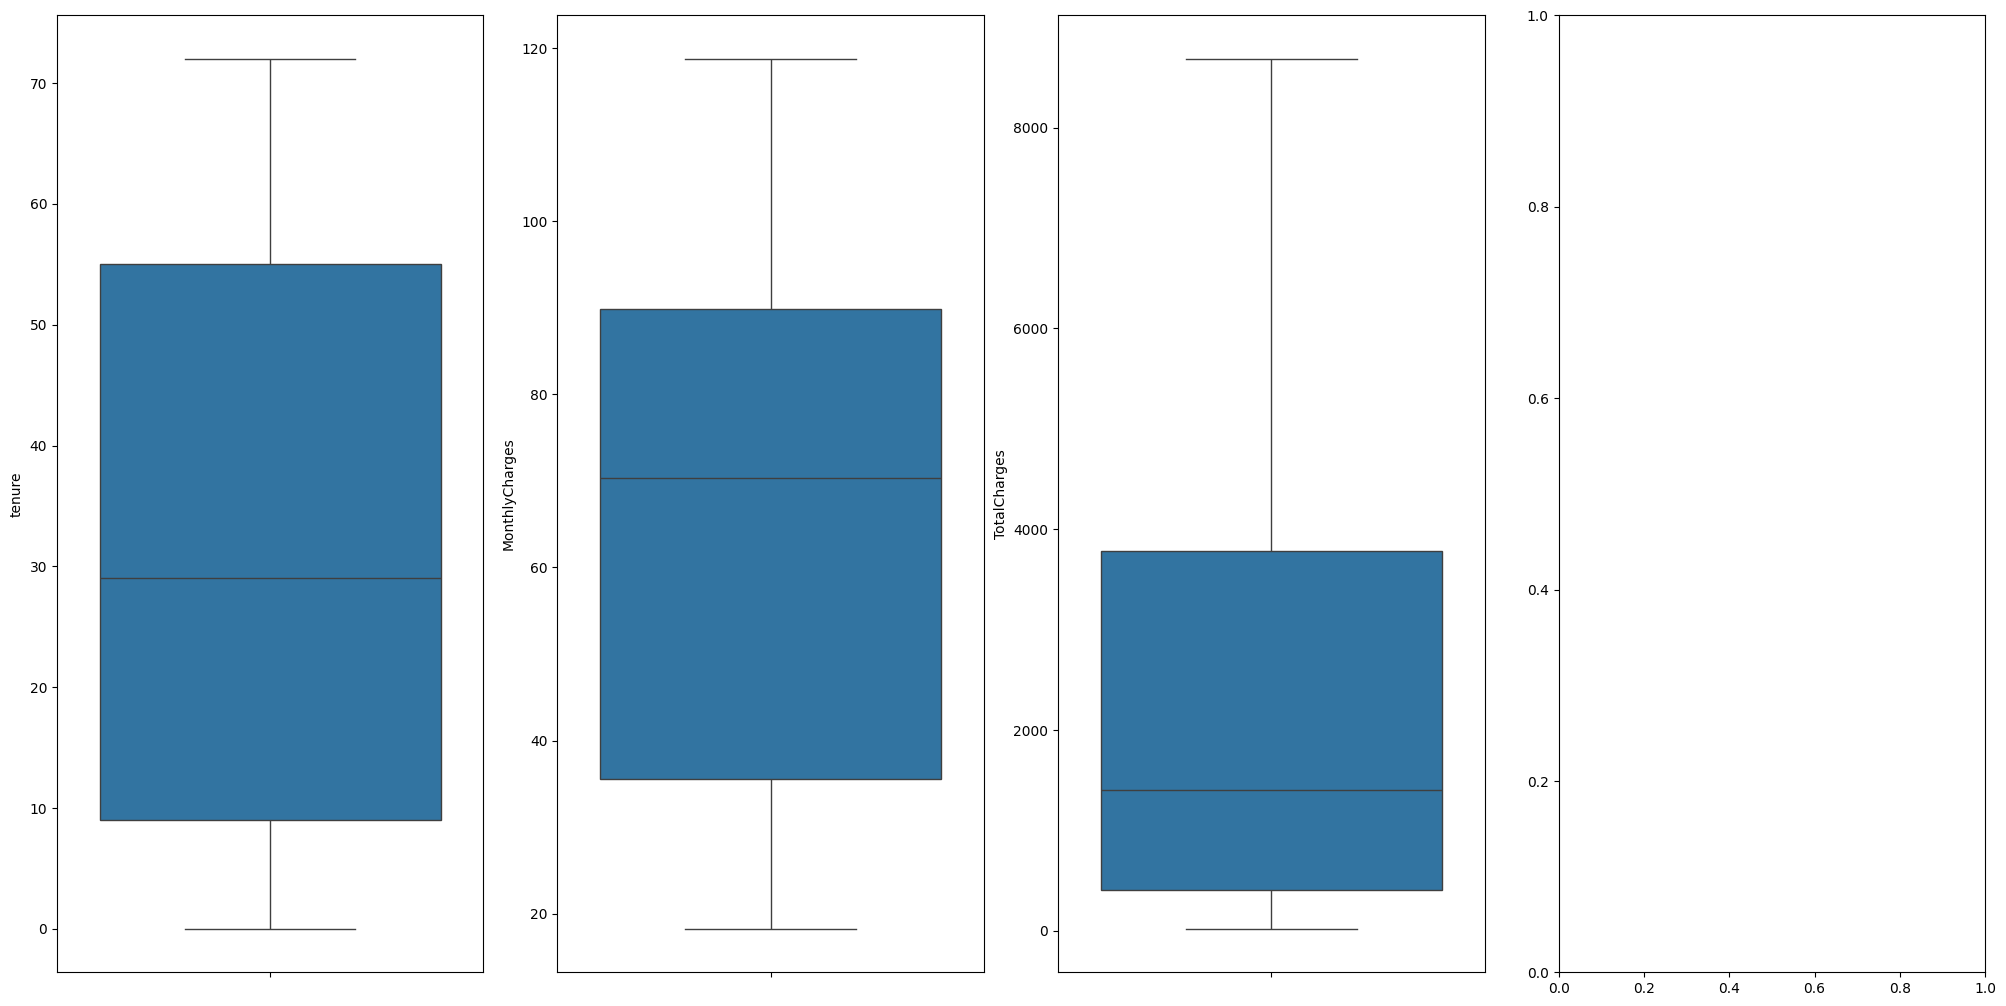

In [20]:
# create box plots
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in data.select_dtypes(include=['int64', 'float64']).columns:
    if col != 'customerID':
        sns.boxplot(y=col, data=data, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [21]:
data['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [22]:
def map_tenure(value):
    if value <= 12:
        return 1
    elif value <= 24:
        return 2
    elif value <= 48:
        return 3
    elif value < 60:
        return 4
    else:  # value >= 60
        return 5

data['tenure'] = data['tenure'].apply(map_tenure)

In [23]:
data['tenure'] 

0       1
1       3
2       1
3       3
4       1
       ..
7038    2
7039    5
7040    1
7041    1
7042    5
Name: tenure, Length: 7043, dtype: int64

In [24]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [25]:
data.drop(['customerID'],axis=1,inplace=True)

In [26]:
categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True,dtype=int)
print(data_encoded.head())

   tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  SeniorCitizen_1  \
0       1           29.85         29.85      0            0                0   
1       3           56.95       1889.50      0            1                0   
2       1           53.85        108.15      1            1                0   
3       3           42.30       1840.75      0            1                0   
4       1           70.70        151.65      1            0                0   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            1               0                 0   
1            0               0                 1   
2            0               0                 1   
3            0               0                 0   
4            0               0                 1   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                               1                  0   
1                               0                  0   
2                               0     

In [27]:
X = data_encoded .drop(['Churn'], axis=1)
y = data_encoded ['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define model
dt = DecisionTreeClassifier(random_state=42)

# Define hyperparameters grid
param_grid_dt = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy',verbose=1)
grid_dt.fit(X_train, y_train)

print("Best parameters:", grid_dt.best_params_)
print("Best score:", grid_dt.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.7854096368642445


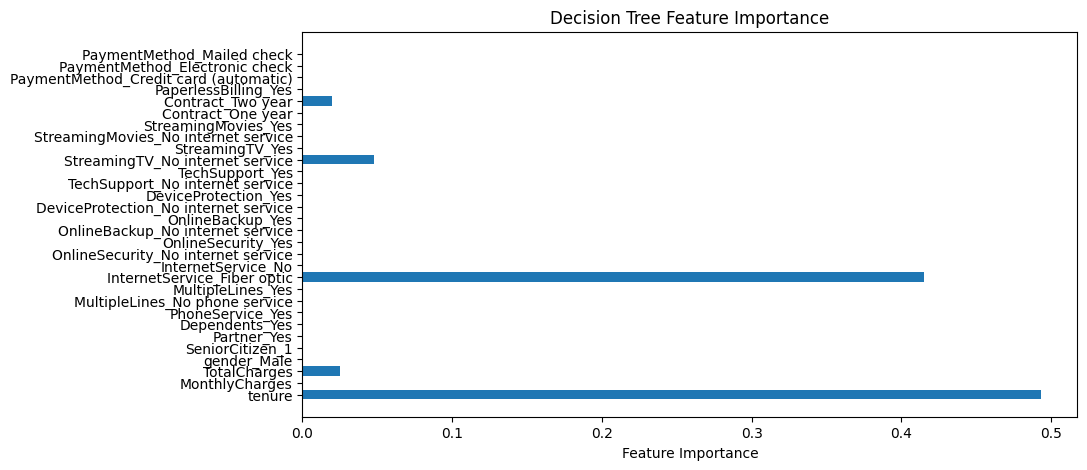

In [39]:
import matplotlib.pyplot as plt

# After the grid search, access the best estimator
best_dt = grid_dt.best_estimator_

# Feature importance
importance = best_dt.feature_importances_
feature_names = X_train.columns

# Plot
plt.figure(figsize=(10,5))
plt.barh(feature_names, importance)
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

In [40]:
best_params = grid_dt.best_params_

# Rebuild with best params
final_dt = DecisionTreeClassifier(
    class_weight={0:1, 1:3},
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    criterion=best_params['criterion'],
    random_state=42
)

# Fit on training data
final_dt.fit(X_train, y_train)

# Predict on test data
final_y_pred = final_dt.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Accuracy:", accuracy_score(y_test, final_y_pred))
print("\nClassification Report:\n", classification_report(y_test, final_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, final_y_pred))

Test Accuracy: 0.6557842441447835

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.56      0.71      1036
           1       0.43      0.91      0.58       373

    accuracy                           0.66      1409
   macro avg       0.69      0.74      0.65      1409
weighted avg       0.81      0.66      0.67      1409


Confusion Matrix:
 [[584 452]
 [ 33 340]]


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler()

# Fit on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

# Define model
lr = LogisticRegression(max_iter=1000)

# Hyperparameters grid (only L2)
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],  # regularization strength
    'penalty': ['l2'],         # L2 regularization
    'solver': ['lbfgs', 'saga']  # solvers that support L2
}

# GridSearchCV
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_scaled ,y_train )

print("Best parameters:", grid_lr.best_params_)
print("Best score:", grid_lr.best_score_)

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.7987224606422999


Top features by absolute coefficient:
MonthlyCharges                           1.273879
InternetService_Fiber optic              0.939223
tenure                                   0.820913
Contract_Two year                        0.650260
StreamingMovies_Yes                      0.353545
StreamingTV_Yes                          0.304574
Contract_One year                        0.292809
MultipleLines_Yes                        0.224038
PaymentMethod_Electronic check           0.164647
PaperlessBilling_Yes                     0.154472
TotalCharges                             0.127222
OnlineSecurity_Yes                       0.110623
OnlineSecurity_No internet service       0.109842
InternetService_No                       0.109842
DeviceProtection_No internet service     0.109842
StreamingMovies_No internet service      0.109842
StreamingTV_No internet service          0.109842
OnlineBackup_No internet service         0.109842
TechSupport_No internet service          0.109842
DeviceProtec

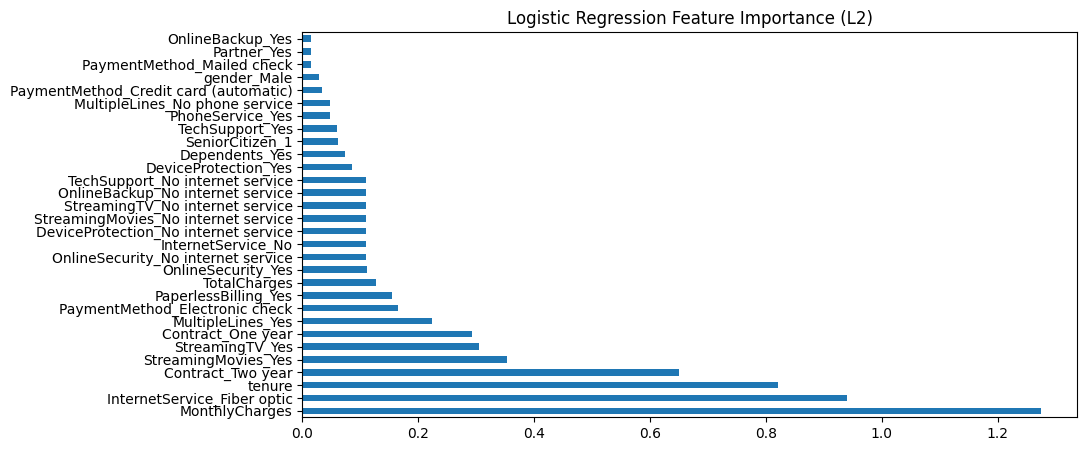

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

best_lr = grid_lr.best_estimator_
coef = best_lr.coef_[0]  # binary classification
importance = pd.Series(np.abs(coef), index=X_train.columns).sort_values(ascending=False)

# Print top features
print("Top features by absolute coefficient:")
print(importance)

# Optional plot
importance.plot(kind='barh', figsize=(10,5), title="Logistic Regression Feature Importance (L2)")
plt.show()

In [47]:
best_params = grid_lr.best_params_

final_model = LogisticRegression(
     class_weight="balanced",
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    max_iter=1000
)

final_model.fit(X_train_scaled, y_train)
final_y_pred = final_model.predict(X_test_scaled)

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Accuracy:", accuracy_score(y_test, final_y_pred))
print("\nClassification Report:\n", classification_report(y_test, final_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,final_y_pred))

Test Accuracy: 0.7544357700496807

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.75      0.77      1409


Confusion Matrix:
 [[755 281]
 [ 65 308]]
